In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
data_df = pd.read_csv("my_data.csv")
data_df

,Street,City,County,State,Zipcode,Price,WalkScore,Bike_Score,Beds,Bath,Sqft,Property_Type,Year_Built,Status
0,38 sharon st unit a,San francisco,San-Francisco,Ca,94114,775000.0,99,95.0,1.0,1.0,651.0,Condo,1900.0,Active
1,94 sussex st,San francisco,San-Francisco,Ca,94131,1575000.0,85,67.0,2.0,2.0,1625.0,Multi-family (2-4 unit),1900.0,Coming soon
2,2152 16th ave,San francisco,San-Francisco,Ca,94116,1298000.0,81,44.0,4.0,3.0,1325.0,Single family residential,1938.0,Active
3,45 pinehurst way,San francisco,San-Francisco,Ca,94127,1698000.0,87,57.0,3.0,1.0,1768.0,Single family home,1928.0,Active
4,1830 fillmore st #311,San francisco,San-Francisco,Ca,94115,1098000.0,99,88.0,2.0,2.0,1107.0,Condo,1984.0,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,1628 5th ave #203,San rafael,Marin-County,Ca,94901,1250000.0,81,64.0,2.0,2.0,1329.0,Condo,2022.0,Active
846,1199 leafwood hts,Novato,Marin-County,Ca,94947,999000.0,27,25.0,3.0,2.0,1748.0,Single family residential,1956.0,Active
847,45 oak rd,Bolinas,Marin-County,Ca,94924,3500000.0,8,21.0,3.0,3.0,2059.0,Single family residential,1939.0,Active
848,621 via casitas,Greenbrae,Marin-County,Ca,94904,675888.0,41,51.0,2.0,2.0,954.0,Condo,1974.0,Active


In [3]:
#removing properties with price less than $30k to remove properties that could be possible scams.
data_df.drop(data_df.index[data_df['Price']<30000],inplace=True)

In [4]:
data_df.describe()
# Performed Exploratory Data Analysis to get a bird's eye view of data. It Showcases show the data is distributed 
# Gives a checkpoint to start other Analysis.

,Price,WalkScore,Bike_Score,Beds,Bath,Sqft,Year_Built
count,8.500000e+02,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,1.340056e+06,62.240000,57.471765,2.932941,2.159412,1728.822353,1960.876471
std,6.604483e+05,30.720731,25.167374,1.148142,0.820562,734.860961,34.200855
min,1.500000e+05,0.000000,0.000000,0.000000,1.000000,379.000000,1857.000000
25%,8.705000e+05,38.000000,39.000000,2.000000,2.000000,1190.000000,1931.000000
50%,1.199000e+06,70.000000,60.000000,3.000000,2.000000,1618.000000,1963.500000
75%,1.695000e+06,90.000000,76.000000,4.000000,2.500000,2144.000000,1987.000000
max,3.500000e+06,100.000000,100.000000,7.000000,4.500000,4185.000000,2022.000000


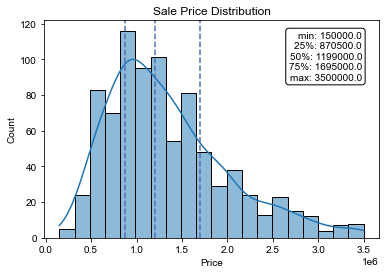

In [5]:
# Plotted the prices of all the counties to see how well the data is distributed. 
# We can conclude that price is positively skewed and mean > mode 
# which tells that there are outliers on the higher range of price of house listing
x = 'Price'
fig, ax = plt.subplots()
ax.title.set_text('Sale Price Distribution')
feature = data_df[x].fillna(data_df[x].mean())
sns.histplot(feature, kde=True)
des = data_df[x].describe()
ax.axvline(des["25%"], ls='--')
ax.axvline(des["50%"], ls='--')
ax.axvline(des["75%"], ls='--')
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "50%: "+des["50%"], "75%: "+des["75%"], "max: "+des["max"]))
ax.text(0.95, 0.95, box, transform=ax.transAxes, fontsize=10, va='top', 
        ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.show()

<AxesSubplot:>

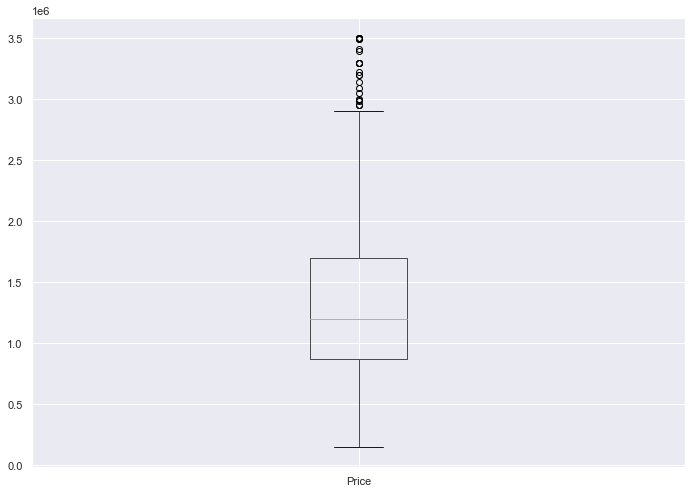

In [6]:
#Boxplot showing that there are more number of outliers on the higher range of price
data_df.boxplot(column=['Price'])

In [7]:
#Creating a column for Price per sqft
data_df['Price_per_sqft'] = (data_df['Price']/data_df['Sqft']).round(2)
data_df

,Street,City,County,State,Zipcode,Price,WalkScore,Bike_Score,Beds,Bath,Sqft,Property_Type,Year_Built,Status,Price_per_sqft
0,38 sharon st unit a,San francisco,San-Francisco,Ca,94114,775000.0,99,95.0,1.0,1.0,651.0,Condo,1900.0,Active,1190.48
1,94 sussex st,San francisco,San-Francisco,Ca,94131,1575000.0,85,67.0,2.0,2.0,1625.0,Multi-family (2-4 unit),1900.0,Coming soon,969.23
2,2152 16th ave,San francisco,San-Francisco,Ca,94116,1298000.0,81,44.0,4.0,3.0,1325.0,Single family residential,1938.0,Active,979.62
3,45 pinehurst way,San francisco,San-Francisco,Ca,94127,1698000.0,87,57.0,3.0,1.0,1768.0,Single family home,1928.0,Active,960.41
4,1830 fillmore st #311,San francisco,San-Francisco,Ca,94115,1098000.0,99,88.0,2.0,2.0,1107.0,Condo,1984.0,Active,991.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,1628 5th ave #203,San rafael,Marin-County,Ca,94901,1250000.0,81,64.0,2.0,2.0,1329.0,Condo,2022.0,Active,940.56
846,1199 leafwood hts,Novato,Marin-County,Ca,94947,999000.0,27,25.0,3.0,2.0,1748.0,Single family residential,1956.0,Active,571.51
847,45 oak rd,Bolinas,Marin-County,Ca,94924,3500000.0,8,21.0,3.0,3.0,2059.0,Single family residential,1939.0,Active,1699.85
848,621 via casitas,Greenbrae,Marin-County,Ca,94904,675888.0,41,51.0,2.0,2.0,954.0,Condo,1974.0,Active,708.48


In [8]:
#Average price_per_sqft for all the cities of Northern San Francisco Bay area

city_df = data_df.groupby(by="City")
city_price_df = pd.DataFrame(city_df['Price_per_sqft'].mean().round(2))
city_price_df

,Price_per_sqft
City,
Alameda,663.56
Albany,702.11
Berkeley,755.79
Bolinas,1343.68
Castro valley,672.38
Corte madera,996.63
Dillon beach,735.29
Dublin,674.83
Emeryville,675.89


In [9]:
# Top 10 and Bottom 10 cities in SF Bay area as per the Average price per square feet

Top10 = pd.DataFrame(city_price_df.sort_values(by = 'Price_per_sqft',ascending=False).head(10))
print(Top10)
Top10['Stack'] = 'Top10'

Bottom10 = pd.DataFrame(city_price_df.sort_values(by = 'Price_per_sqft',ascending=False).tail(10))
print(Bottom10)
Bottom10['Stack'] = 'Bottom10'

               Price_per_sqft
City                         
Inverness             1354.15
Bolinas               1343.68
Larkspur              1113.61
Tiburon               1038.85
Kentfield             1016.66
Corte madera           996.63
Mill valley            994.82
Sausalito              980.31
San francisco          978.34
Piedmont               922.32
               Price_per_sqft
City                         
Dublin                 674.83
Castro valley          672.38
Livermore              668.50
Alameda                663.56
San lorenzo            641.08
Novato                 587.87
Oakland                579.07
Hayward                576.36
San leandro            569.22
San geronimo           504.11


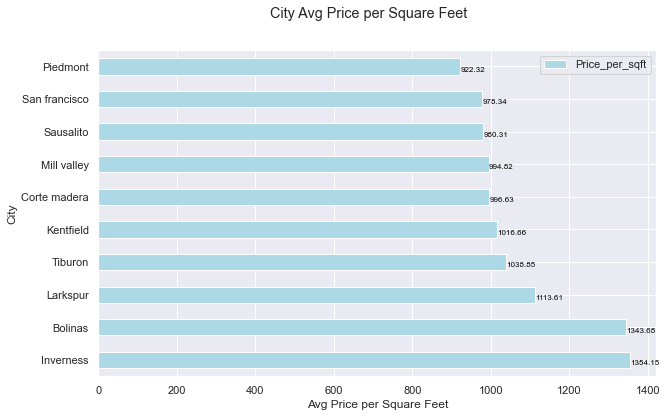

In [10]:
#Top 10 cities in SF Bay area according to Average price per square feet


# Horizontal Bar Plot
ax = Top10.plot(kind='barh',color='lightblue',figsize=(10,6))
plt.xlabel("Avg Price per Square Feet")
plt.ylabel("City") 

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.4, i.get_y()+0.1,
             str(round((i.get_width()), 2)),
             fontsize = 8, color ='black')
    
plt.suptitle('City Avg Price per Square Feet')
# Show Plot
plt.show()

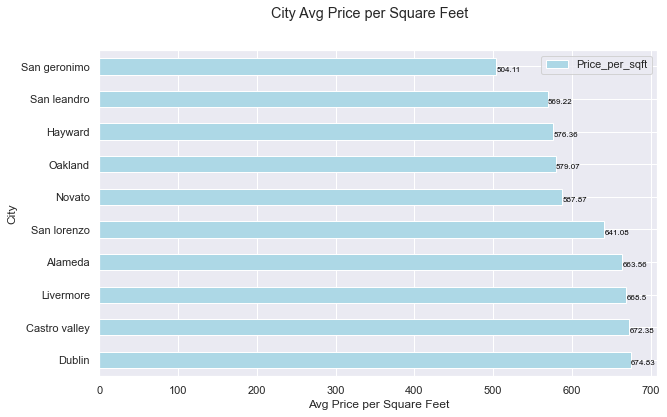

In [11]:
#Bottom 10 cities in SF Bay area according to Average price per square feet

 
# Horizontal Bar Plot
ax = Bottom10.plot(kind='barh',color='lightblue',figsize=(10,6))
plt.xlabel("Avg Price per Square Feet")
plt.ylabel("City") 

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.4, i.get_y()+0.1,
             str(round((i.get_width()), 2)),
             fontsize = 8, color ='black')
    
plt.suptitle('City Avg Price per Square Feet')
# Show Plot
plt.show()

In [12]:
# Number of beds/ bath countywise - total properties

properties = data_df['County'].value_counts() 
print(properties)

data_df[['County','Beds', 'Bath']]

Alameda-County    315
Marin-County      275
San-Francisco     260
Name: County, dtype: int64


,County,Beds,Bath
0,San-Francisco,1.0,1.0
1,San-Francisco,2.0,2.0
2,San-Francisco,4.0,3.0
3,San-Francisco,3.0,1.0
4,San-Francisco,2.0,2.0
...,...,...,...
845,Marin-County,2.0,2.0
846,Marin-County,3.0,2.0
847,Marin-County,3.0,3.0
848,Marin-County,2.0,2.0


In [13]:
#number of houses with total bed in different county

cross_tab = pd.crosstab(data_df['County'],data_df['Beds'])
print(cross_tab)

Beds            0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0
County                                                
Alameda-County    0   19   62  122   80   24    8    0
Marin-County      0   19   66   98   77   13    2    0
San-Francisco     6   43   88   66   42   10    4    1


In [14]:
#Total properties according to no. of beds

data_beds_order= data_df.sort_values(by ='Beds')
prop_beds_df = data_beds_order['Beds'].value_counts() 
prop_beds_df

3.0    286
2.0    216
4.0    199
1.0     81
5.0     47
6.0     14
0.0      6
7.0      1
Name: Beds, dtype: int64

In [15]:
#Average price of house with no. of bed in top 10 city

cross_tab = pd.crosstab(index=data_df['City'], columns=data_df['Beds'], values=data_df['Price'], margins=True, aggfunc='mean').replace(np.nan, 0).astype(np.int64)


cross_tab.loc[['Inverness','Bolinas','Larkspur', 'Tiburon', 'Kentfield', 'Corte madera', 'Mill valley', 'San francisco', 'Sausalito', 'Piedmont'],[1,2,3,4,5]]

Beds,1,2,3,4,5
City,,,,,
Inverness,0,1482500,0,0,0
Bolinas,0,2225000,3500000,1888000,0
Larkspur,0,1950000,2398500,2748333,0
Tiburon,0,799000,2474250,0,0
Kentfield,0,0,0,2205500,0
Corte madera,0,1397333,1637428,1399000,0
Mill valley,821333,1230750,1975444,2555675,0
San francisco,811100,1260558,1735649,2021976,2056800
Sausalito,633666,1471714,2429333,2549000,0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Inverness'),
  Text(1, 0, 'Bolinas'),
  Text(2, 0, 'Larkspur'),
  Text(3, 0, 'Tiburon'),
  Text(4, 0, 'Kentfield'),
  Text(5, 0, 'Corte madera'),
  Text(6, 0, 'Mill valley'),
  Text(7, 0, 'San francisco'),
  Text(8, 0, 'Sausalito'),
  Text(9, 0, 'Piedmont')])

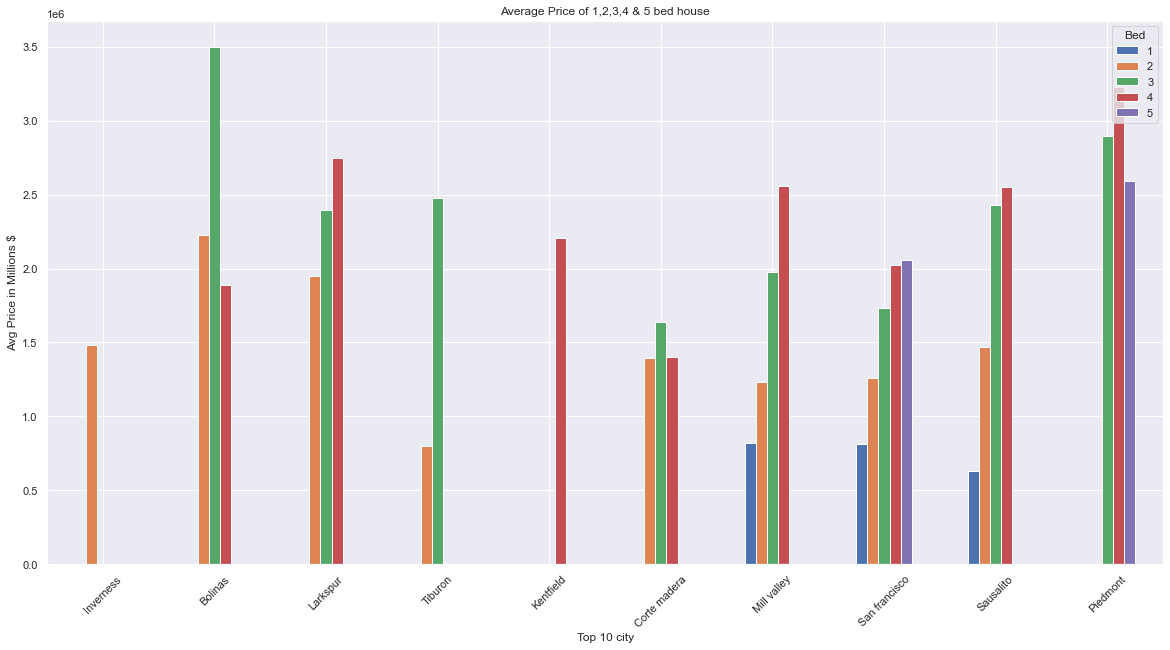

In [16]:
#Average prices of house per bed 

cross_tab.loc[['Inverness','Bolinas','Larkspur', 'Tiburon', 'Kentfield', 'Corte madera', 'Mill valley', 'San francisco', 'Sausalito', 'Piedmont'],[1,2,3,4,5]].plot.bar(figsize=(20,10))

plt.title('Average Price of 1,2,3,4 & 5 bed house')
plt.ylabel('Avg Price in Millions $')
plt.xlabel('Top 10 city')
plt.legend(loc = 'upper right', ncol = 1, title = "Bed")
plt.xticks(rotation = 45)

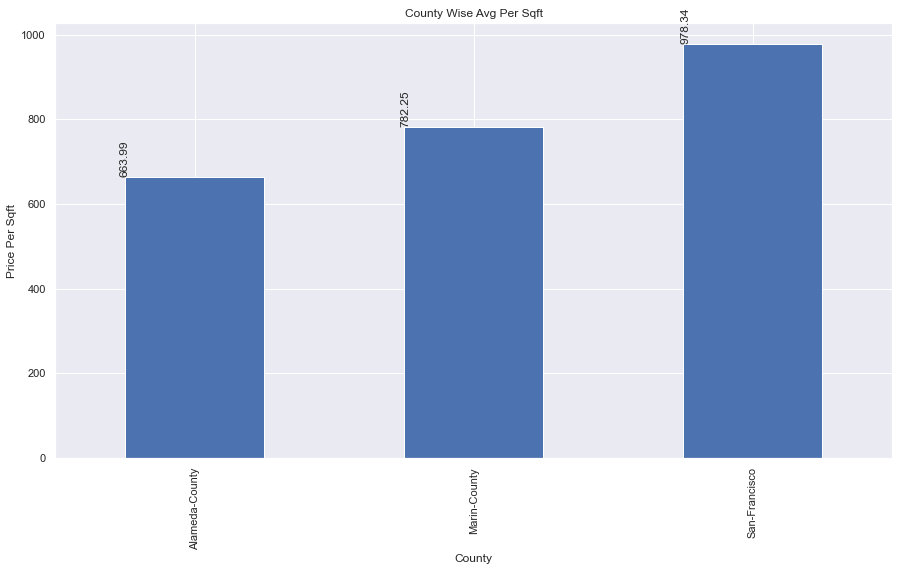

In [17]:
#Bar plot of county and average price per sqft
df_grp = data_df.groupby(['County'])['Price_per_sqft'].mean().round(2)
ax = df_grp.plot(kind='bar', figsize = (15,8))
plt.ylabel("Price Per Sqft")
plt.title('County Wise Avg Per Sqft')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), horizontalalignment='center', rotation='vertical')


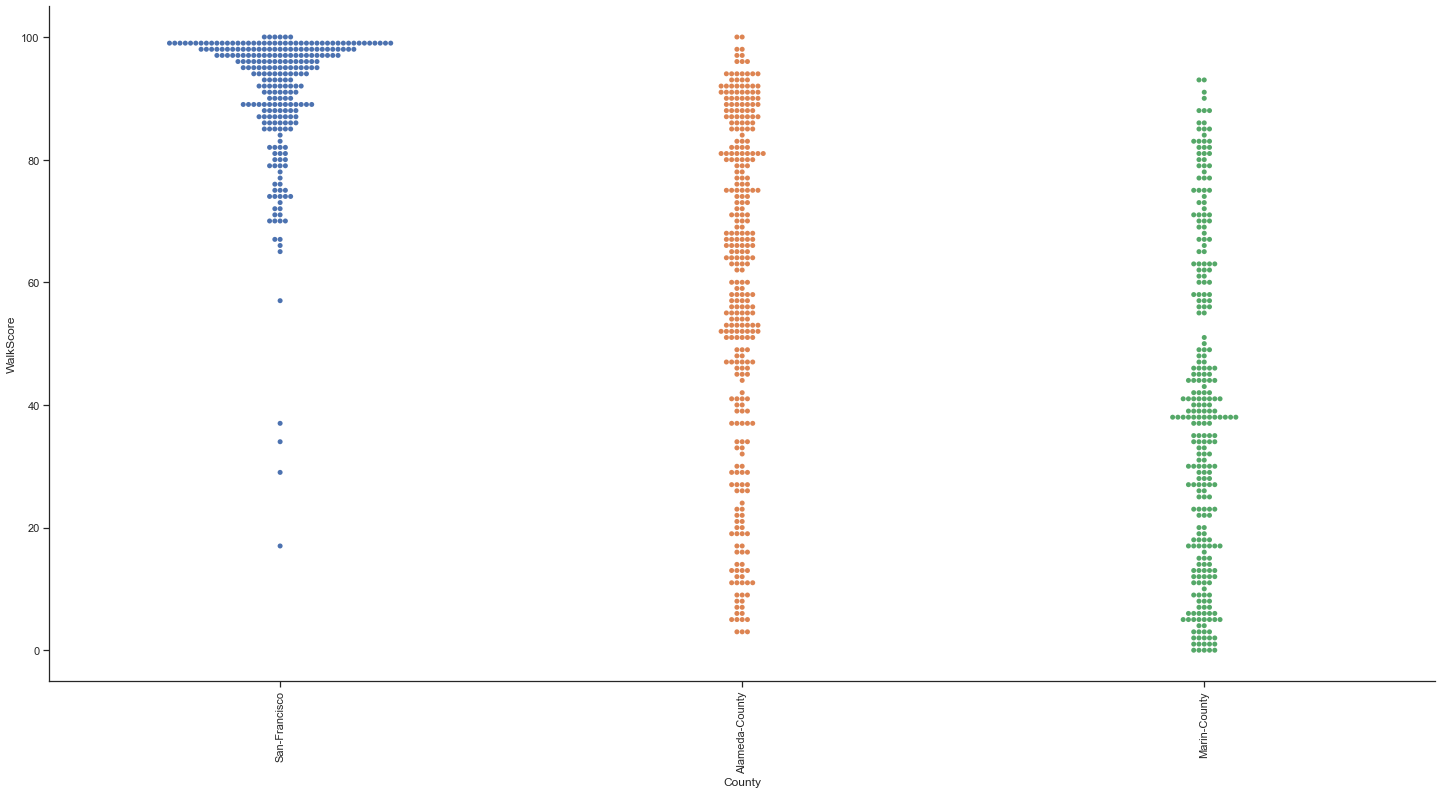

In [18]:
#Catplot of walkscore and bike score to check range of scores county wise
import matplotlib.pyplot as plot
import warnings
warnings.filterwarnings('ignore')
new_data_df = data_df.dropna(subset=['County', 'WalkScore', 'Bike_Score'])

sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x="County", y="WalkScore", data=new_data_df, height=10, aspect=20/10, kind='swarm')
g.set_xticklabels(rotation=90)

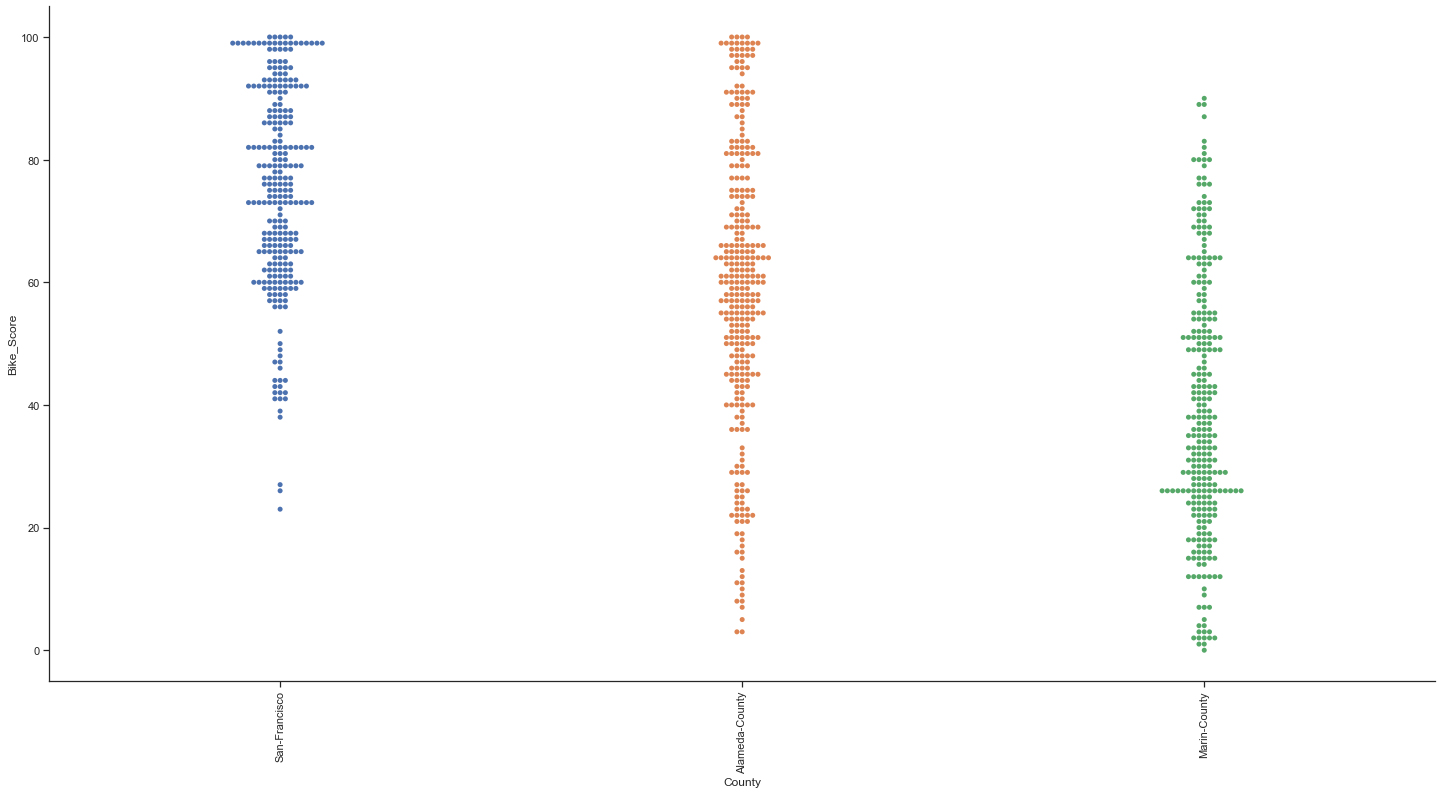

In [19]:
warnings.filterwarnings('ignore')
new_data_df = data_df.dropna(subset=['County', 'WalkScore', 'Bike_Score'])

sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x="County", y="Bike_Score", data=new_data_df, height=10, aspect=20/10, kind='swarm')
g.set_xticklabels(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Alameda-County'),
  Text(1, 0, 'Marin-County'),
  Text(2, 0, 'San-Francisco')])

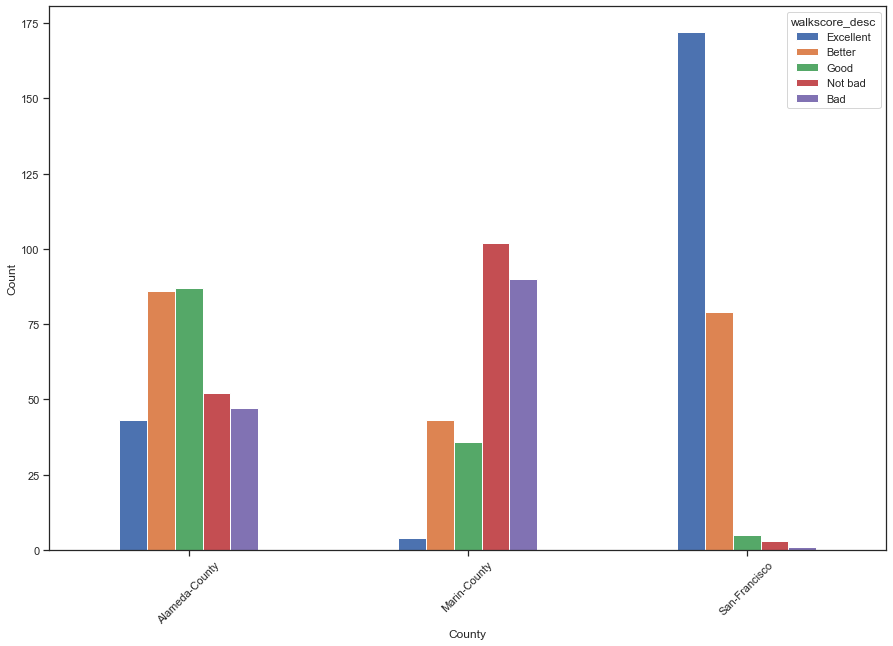

In [20]:
#Categorizing scores into ordinal categories
walkscore_list = []
for t in data_df['WalkScore']:
    if t <= 100 and t >= 90:
        walkscore_list.append('Excellent')
    elif t <= 89 and t >= 70:
        walkscore_list.append('Better')
    elif t <= 69 and t >= 50:
        walkscore_list.append('Good')
    elif t <= 49 and t >= 25:
        walkscore_list.append('Not bad')
    elif t <= 24 and t >= 0:
        walkscore_list.append('Bad')
    else:
        walkscore_list.append('')
data_df['walkscore_desc'] = walkscore_list
g = pd.crosstab(data_df['County'], data_df['walkscore_desc'])
County_3 = ['Alameda-County','Marin-County','San-Francisco']
unique_ts = list(data_df['walkscore_desc'].unique())
g.loc[County_3, unique_ts].plot.bar(figsize=(15,10))
plot.xlabel('County')
plot.ylabel('Count')
plot.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Alameda-County'),
  Text(1, 0, 'Marin-County'),
  Text(2, 0, 'San-Francisco')])

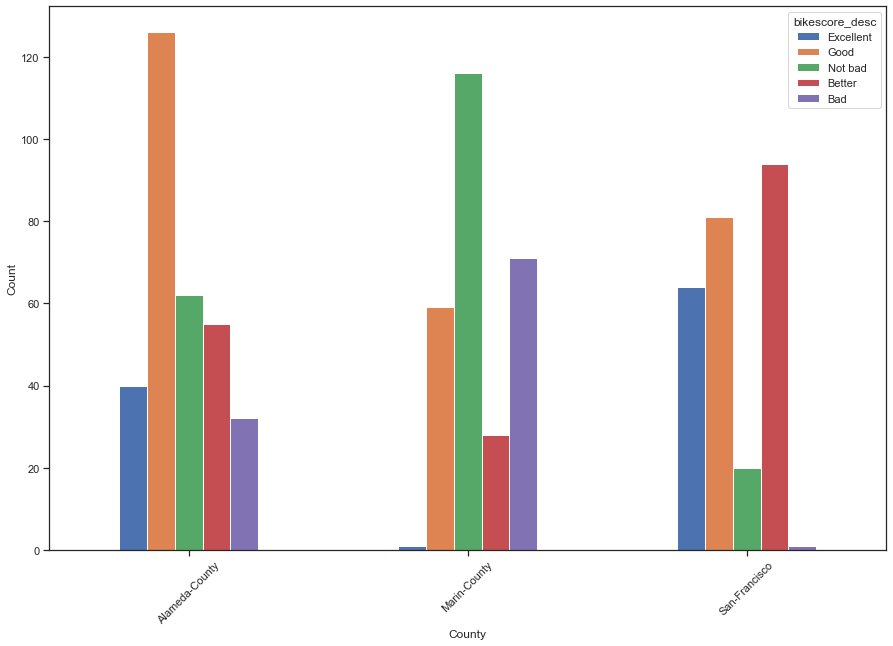

In [21]:
bikescore_list = []
for t in data_df['Bike_Score']:
    if t <= 100 and t >= 90:
        bikescore_list.append('Excellent')
    elif t <= 89 and t >= 70:
        bikescore_list.append('Better')
    elif t <= 69 and t >= 50:
        bikescore_list.append('Good')
    elif t <= 49 and t >= 25:
        bikescore_list.append('Not bad')
    elif t <= 24 and t >= 0:
        bikescore_list.append('Bad')
    else:
        bikescore_list.append('')
data_df['bikescore_desc'] = bikescore_list
g = pd.crosstab(data_df['County'], data_df['bikescore_desc'])
County_3 = ['Alameda-County','Marin-County','San-Francisco']
unique_ts = list(data_df['bikescore_desc'].unique())
g.loc[County_3, unique_ts].plot.bar(figsize=(15,10))
plot.xlabel('County')
plot.ylabel('Count')
plot.xticks(rotation=45)

Text(0.5, 1.0, 'Correlation b/w Price and WalkScores')

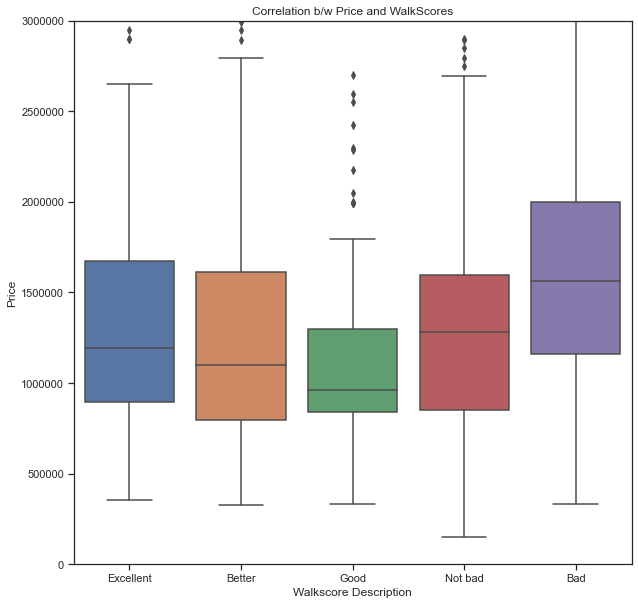

In [22]:
# Price range based on the walkscore and bikescore (averaged for each county)
plot.figure(figsize=(10,10))
sns.boxplot(x="walkscore_desc", y="Price", data=data_df)
plot.ticklabel_format(style='plain', axis='y')
plot.ylim(0, 3000000)
plot.ylabel("Price")
plot.xlabel("Walkscore Description")
plot.title("Correlation b/w Price and WalkScores")

Text(0.5, 1.0, 'Correlation b/w Price and BikeScores')

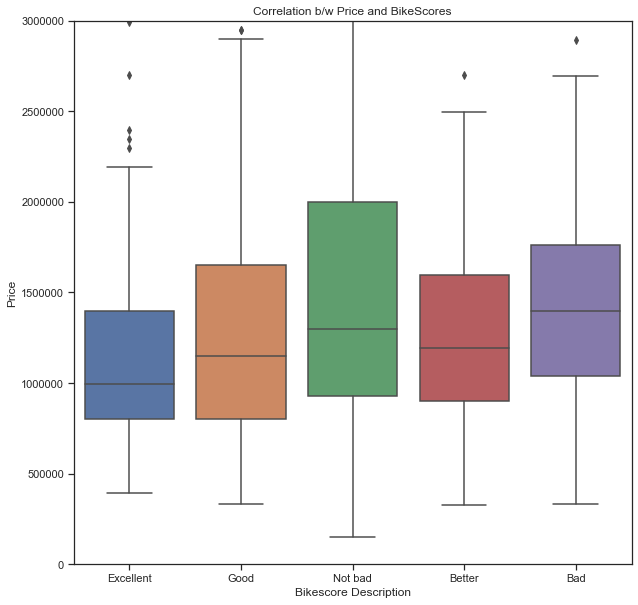

In [23]:
plot.figure(figsize=(10,10))
sns.boxplot(x="bikescore_desc", y="Price", data=data_df)
plot.ticklabel_format(style='plain', axis='y')
plot.ylim(0, 3000000)
plot.ylabel("Price")
plot.xlabel("Bikescore Description")
plot.title("Correlation b/w Price and BikeScores")

In [24]:
#Crosstab between county & status, county & property type to see how manu properties belong to different categories
#of status and property type
cross_tab = pd.crosstab(data_df['County'],data_df['Status'])
cross_tab

Status,Active,Active-reo,Coming soon,Contingent,New,Pending,Price change
County,,,,,,,
Alameda-County,107,0,0,1,198,1,8
Marin-County,271,1,0,0,3,0,0
San-Francisco,258,0,1,0,1,0,0


In [25]:
cross_tab = pd.crosstab(data_df['County'],data_df['Property_Type'])
cross_tab

Property_Type,Co-op,Condo,Duplex,Mobile/manufactured home,Multi-family (2-4 unit),Multi-family (5+ unit),Residential income,Single family home,Single family residential,Townhouse,Triplex
County,,,,,,,,,,,
Alameda-County,0,51,0,1,13,0,1,17,202,30,0
Marin-County,1,67,0,3,1,1,0,2,188,12,0
San-Francisco,6,141,1,0,14,0,0,9,87,1,1


In [26]:
#Categorizing property types into generic categories

In [27]:
Property_Type_Category =[]
for i in data_df['Property_Type']:
    if i in ['Single family', 'Single family home', 'Single family residence',
                'Single family residential','Single-wide mobile home']:
        Property_Type_Category.append('Single')
        
    elif i in ['Residential, single family', 'Residential, townhouse', 'Townhouse']:
        Property_Type_Category.append('Residential')
        
    elif i in ['Cabin', 'Co-op', 'Condo', 'Condo/co-op']:
        Property_Type_Category.append('Condo')
        
    else :
        Property_Type_Category.append('Others')

In [28]:
data_df['Property_Type_Category'] =Property_Type_Category
data_df

,Street,City,County,State,Zipcode,Price,WalkScore,Bike_Score,Beds,Bath,Sqft,Property_Type,Year_Built,Status,Price_per_sqft,walkscore_desc,bikescore_desc,Property_Type_Category
0,38 sharon st unit a,San francisco,San-Francisco,Ca,94114,775000.0,99,95.0,1.0,1.0,651.0,Condo,1900.0,Active,1190.48,Excellent,Excellent,Condo
1,94 sussex st,San francisco,San-Francisco,Ca,94131,1575000.0,85,67.0,2.0,2.0,1625.0,Multi-family (2-4 unit),1900.0,Coming soon,969.23,Better,Good,Others
2,2152 16th ave,San francisco,San-Francisco,Ca,94116,1298000.0,81,44.0,4.0,3.0,1325.0,Single family residential,1938.0,Active,979.62,Better,Not bad,Single
3,45 pinehurst way,San francisco,San-Francisco,Ca,94127,1698000.0,87,57.0,3.0,1.0,1768.0,Single family home,1928.0,Active,960.41,Better,Good,Single
4,1830 fillmore st #311,San francisco,San-Francisco,Ca,94115,1098000.0,99,88.0,2.0,2.0,1107.0,Condo,1984.0,Active,991.87,Excellent,Better,Condo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,1628 5th ave #203,San rafael,Marin-County,Ca,94901,1250000.0,81,64.0,2.0,2.0,1329.0,Condo,2022.0,Active,940.56,Better,Good,Condo
846,1199 leafwood hts,Novato,Marin-County,Ca,94947,999000.0,27,25.0,3.0,2.0,1748.0,Single family residential,1956.0,Active,571.51,Not bad,Not bad,Single
847,45 oak rd,Bolinas,Marin-County,Ca,94924,3500000.0,8,21.0,3.0,3.0,2059.0,Single family residential,1939.0,Active,1699.85,Bad,Bad,Single
848,621 via casitas,Greenbrae,Marin-County,Ca,94904,675888.0,41,51.0,2.0,2.0,954.0,Condo,1974.0,Active,708.48,Not bad,Good,Condo


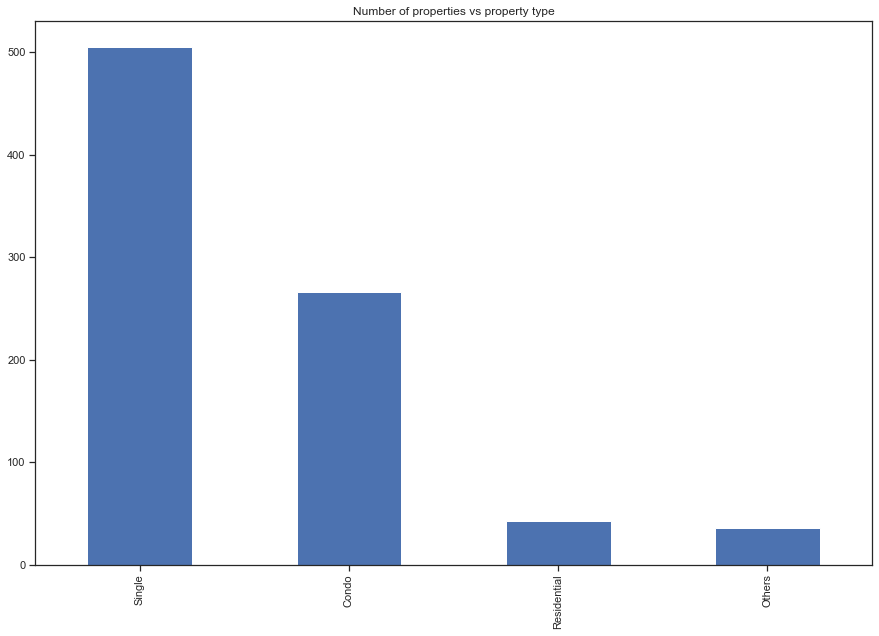

In [29]:
#Bar plot of Proeprty type category vs Number of properties
ax = data_df['Property_Type_Category'].value_counts().plot(kind='bar',figsize=(15,10),
                                                      title='Number of properties vs property type')

In [30]:
#Prediction Analysis

<AxesSubplot:>

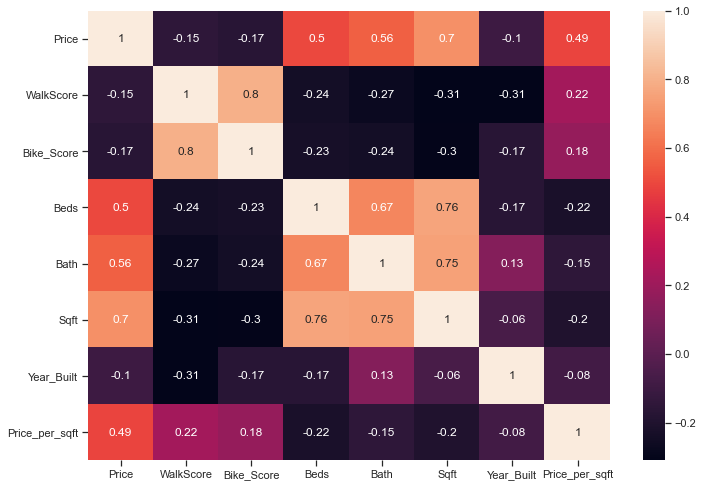

In [31]:
#Plotting correlation matrix to see how Price is correlated with other variables
correlation_matrix = data_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
# It shows price is correlated to Sqft followed by Bath and Bed.
# It also shows that years built has almost no correlation with price which means land maintains its 
#value over the years and additional significant modification done on the property would not result in significant gain.

In [32]:
#X - columns that will be used for prediction
#Y - target variable that will be predicted

In [33]:
#Including attributes with positive correlation as independent variables
X=data_df[['WalkScore','Bike_Score','Beds','Bath','Sqft']]

In [34]:
Y=data_df['Price'].values

In [35]:
#splitting data into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8)

In [36]:
#fitting and transforming model
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.fit_transform(X_test.astype(np.float))

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
#intercept and slope
print(regressor.intercept_)
print(regressor.coef_)

1346430.6808823529
[ 67372.8247837  -25410.71959048 -68799.62738502  65541.176561
 475939.68899262]


In [39]:
#predicting the test data
Y_pred = regressor.predict(X_test)

<AxesSubplot:ylabel='Density'>

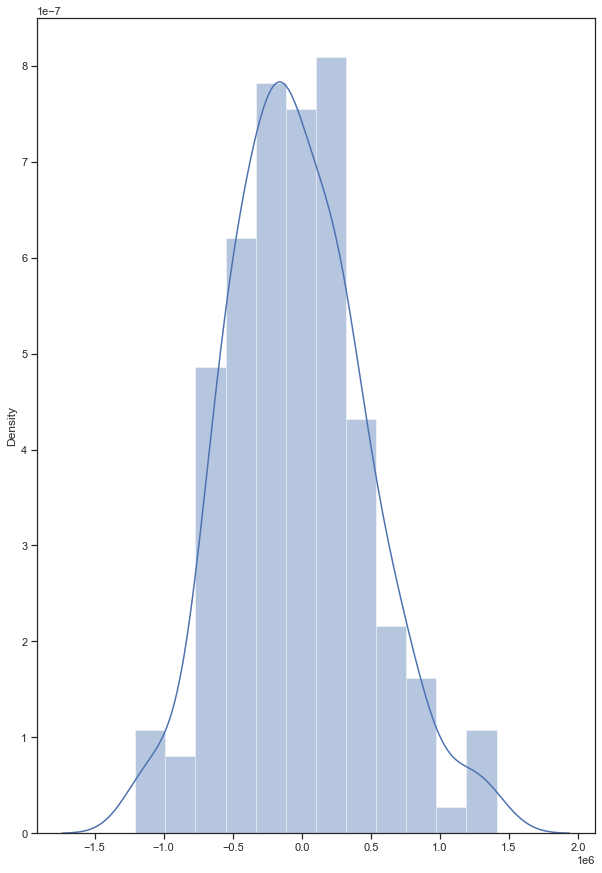

In [40]:
#plotting residuals graph 
fig = plt.figure(figsize=(10,15))
residuals = (Y_test - Y_pred)
sns.distplot(residuals)

In [41]:
#actual vs predicted and errors
df_pred = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
print(df_pred.head())
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test,Y_pred)) 
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test,Y_pred)) 
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_absolute_error(Y_test,Y_pred)))
print('Variance Score: ', metrics.explained_variance_score(Y_test,Y_pred))

      Actual     Predicted
0  1195000.0  1.375594e+06
1  1095000.0  8.724137e+05
2  1450000.0  1.528060e+06
3   600000.0  1.126417e+06
4  2795000.0  1.926973e+06
Mean Absolute Error:  393794.1791813024
Mean Squared Error:  241742519731.08502
Root Mean Squared Error:  627.5302217274499
Variance Score:  0.49065019137592236


                   Coeff
Bath        73270.682995
WalkScore    2376.545415
Sqft          666.445303
Bike_Score   -863.484552
Beds       -39368.573060


R^2 is:  0.5035119465115586


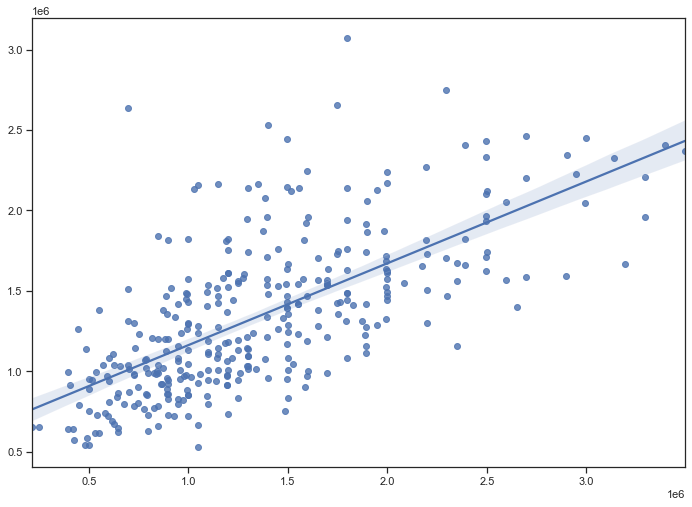

In [42]:
lm=LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=101)

lm.fit(X_train,Y_train) #fitting the model

predictions=lm.predict(X_test) #calculating predictions based on the model creaated in previous line

sns.regplot(Y_test,predictions,fit_reg=True) #plotting the model

cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff']) #Creating a datframe of coefficients obtained from the model
print(cdf.sort_values(by='Coeff',ascending=False))

print("\n")

print("R^2 is: ",lm.score(X,Y))